#**Simple Linear Regression Algorithm**
>Simple  regression is used to estimate the relationship between two quantitative variables that're dependent variable and independent variable. 

>You can use simple linear regression when you want to know:
1. How strong the relationship is between two variables (e.g. the relationship between rainfall and soil erosion).
2. The value of the dependent variable at a certain value of the independent variable (e.g. the amount of soil erosion at a certain level of rainfall).

>**Equation for simple linear regression :**
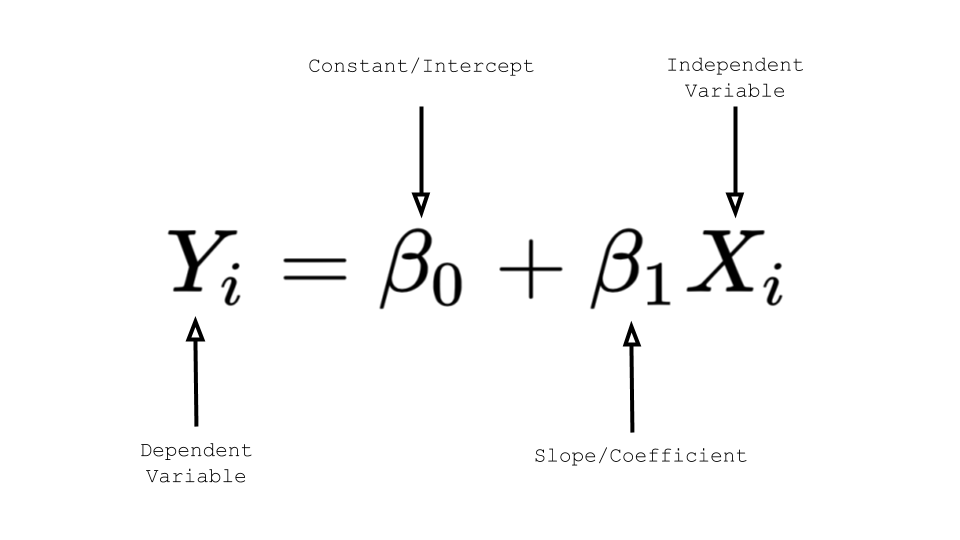


## **Importing Libraries :**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy  as np
%matplotlib inline
sns.set(rc={'figure.figsize':(7, 7)}, font_scale=1.2)

##**1. Frist Model**
> In this model we study the relationship between the salaries and years of experience and try to predict the salaries depend on years of experience.

In [ ]:
df_salary = pd.read_csv('Salary_Data.csv')

In [ ]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
df_salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
df_salary.sample(5)

,YearsExperience,Salary
19,6.0,93940.0
12,4.0,56957.0
10,3.9,63218.0
26,9.5,116969.0
13,4.1,57081.0


In [ ]:
df_salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


###**1. Detecting Inputs and Outputs**

In [ ]:
inputs = df_salary.iloc[:,:-1].values
outputs = df_salary.iloc[:, -1].values

In [ ]:
inputs

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [ ]:
outputs

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

### **2. Spliting Data to Train and Test**

In [ ]:
from  sklearn.model_selection import train_test_split
inputs_train , inputs_test , outputs_train , outputs_test = train_test_split(inputs,outputs,test_size = 0.3,random_state = 12)

In [ ]:

inputs_train

array([[ 3.7],
       [ 6.8],
       [ 3.2],
       [ 6. ],
       [ 1.1],
       [ 3.9],
       [10.3],
       [10.5],
       [ 9. ],
       [ 4.1],
       [ 2.9],
       [ 9.5],
       [ 5.1],
       [ 4. ],
       [ 8.7],
       [ 2. ],
       [ 1.5],
       [ 5.3],
       [ 3. ],
       [ 9.6],
       [ 4. ]])

In [ ]:
inputs_train.shape

(21, 1)

In [ ]:
inputs_test

array([[3.2],
       [7.9],
       [5.9],
       [4.5],
       [1.3],
       [7.1],
       [2.2],
       [4.9],
       [8.2]])

In [ ]:

inputs_test.shape

(9, 1)

In [ ]:
outputs_train

array([[ 57189.],
       [ 91738.],
       [ 64445.],
       [ 93940.],
       [ 39343.],
       [ 63218.],
       [122391.],
       [121872.],
       [105582.],
       [ 57081.],
       [ 56642.],
       [116969.],
       [ 66029.],
       [ 56957.],
       [109431.],
       [ 43525.],
       [ 37731.],
       [ 83088.],
       [ 60150.],
       [112635.],
       [ 55794.]])

In [ ]:
outputs_train.shape

(21, 1)

In [ ]:
outputs_test

array([[ 54445.],
       [101302.],
       [ 81363.],
       [ 61111.],
       [ 46205.],
       [ 98273.],
       [ 39891.],
       [ 67938.],
       [113812.]])

In [ ]:
outputs_test.shape

(9, 1)

### **3. Create Model**

**Creation**

In [ ]:
from sklearn.linear_model import LinearRegression
simple_linear_model = LinearRegression()

**Training**

In [ ]:
simple_linear_model.fit(inputs_train,outputs_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Testing**

In [ ]:
outputs_pred = simple_linear_model.predict(inputs_test)

In [ ]:

print('Real Outputs in Testing : \n ', outputs_test)
print('--'*50)
print('Predicated Outputs in Testing : \n ', outputs_pred)

Real Outputs in Testing : 
  [[ 54445.]
 [101302.]
 [ 81363.]
 [ 61111.]
 [ 46205.]
 [ 98273.]
 [ 39891.]
 [ 67938.]
 [113812.]]
----------------------------------------------------------------------------------------------------
Predicated Outputs in Testing : 
  [[ 56286.01106107]
 [ 99660.38783282]
 [ 81203.20622782]
 [ 68283.17910432]
 [ 38751.68853633]
 [ 92277.51519082]
 [ 47057.42025858]
 [ 71974.61542532]
 [102428.96507357]]


**Identifying Paramters in model**

In [ ]:
print('Slope (coefficeint) in the model :',simple_linear_model.coef_)
print('--'*50)
print('Intercept Part from y-axis in the model :',simple_linear_model.intercept_)

Slope (coefficeint) in the model : [[9228.5908025]]
----------------------------------------------------------------------------------------------------
Intercept Part from y-axis in the model : [26754.52049308]


**The Model Equation is :**

>h(X) = 26754.520493079042 +  X*9228.5908025

###**4. Evaluating Model**

In [ ]:
print('Training Score is : ' , simple_linear_model.score(inputs_train, outputs_train))
print(' ------------------------------------------------------------')
print('Testing Score is : ' , simple_linear_model.score(inputs_test, outputs_test))

Training Score is :  0.9627634622902508
 ------------------------------------------------------------
Testing Score is :  0.9369810046174128


In [ ]:
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

In [ ]:
MAE = mean_absolute_error(outputs_test,outputs_pred)
MSE = mean_squared_error(outputs_test,outputs_pred)
medien_error = median_absolute_error(outputs_test,outputs_pred)

In [ ]:

print(' Absolute Mean Error :',MAE)
print('--'*50)
print(' Absolute Median Error :',medien_error)
print('--'*50)
print(' Mean Squared Error :',MSE)
print('--'*50)
print(' Root Mean Squared Error :',np.sqrt(MSE))

 Absolute Mean Error : 5205.495887549204
----------------------------------------------------------------------------------------------------
 Absolute Median Error : 5995.484809180911
----------------------------------------------------------------------------------------------------
 Mean Squared Error : 38474768.53456033
----------------------------------------------------------------------------------------------------
 Root Mean Squared Error : 6202.803280337072


###**5. Visualization Model**

**Training Visualization**

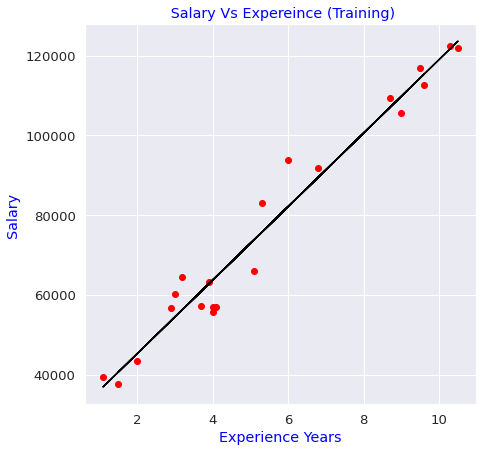

In [ ]:
plt.scatter(inputs_train,outputs_train,color = 'red')
plt.plot(inputs_train,simple_linear_model.predict(inputs_train),color = 'black')
plt.title(' Salary Vs Expereince (Training)' , color = 'blue')
plt.xlabel('Experience Years',color = 'blue')
plt.ylabel('Salary ', color = 'blue')
plt.show()

**Testing Visualuzation**

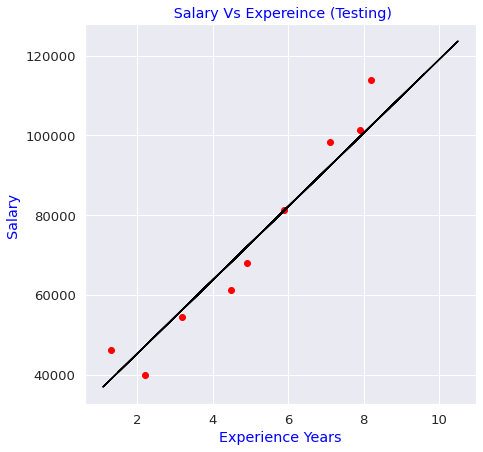

In [ ]:
plt.scatter(inputs_test,outputs_test,color = 'red')
plt.plot(inputs_train,simple_linear_model.predict(inputs_train),color = 'black')
plt.title(' Salary Vs Expereince (Testing)' , color = 'blue')
plt.xlabel('Experience Years',color = 'blue')
plt.ylabel('Salary ', color = 'blue')
plt.show()

**Training and Testing Visualiazation**

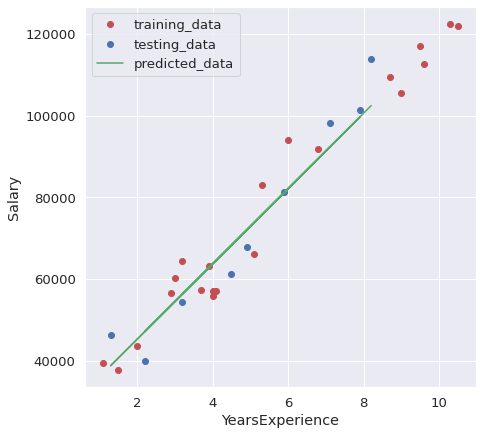

In [ ]:
plt.plot(inputs_train, outputs_train, 'ro', label='training_data')
plt.plot(inputs_test, outputs_test, 'bo', label='testing_data')
plt.plot(inputs_test, outputs_pred, 'g-', label='predicted_data')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()


## **2. Second Model**

> In this model we study the relationship between the income and degree of happiness and try to predict the degree of happiness  depend on income.





In [ ]:
df_income = pd.read_csv('/content/income.data.csv')

In [ ]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  498 non-null    int64  
 1   income      498 non-null    float64
 2   happiness   498 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [ ]:
df_income.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   income     498 non-null    float64
 1   happiness  498 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [ ]:
df_income.describe()

,income,happiness
count,498.000000,498.000000
mean,4.466902,3.392859
std,1.737527,1.432813
min,1.506275,0.266044
25%,3.006256,2.265864
50%,4.423710,3.472536
75%,5.991913,4.502621
max,7.481521,6.863388


In [ ]:
df_income.sample(5)

,income,happiness
428,3.860696,2.435095
478,4.172337,3.751225
51,5.370337,3.225133
45,5.358716,3.752659
278,2.858464,2.453209


In [ ]:
df_income.corr()

,income,happiness
income,1.000000,0.865634
happiness,0.865634,1.000000


### **1. Detecting Inputs and Outputs**

In [ ]:
inputs = df_income.iloc[:,:1].values
outputs = df_income.iloc[:, -1:].values

In [ ]:
inputs

array([[3.86264742],
       [4.97938138],
       [4.92395694],
       [3.21437244],
       [7.19640925],
       [3.72964348],
       [4.67451739],
       [4.49810382],
       [3.12163053],
       [4.63991444],
       [4.63283951],
       [2.7731789 ],
       [7.11947859],
       [7.4666532 ],
       [2.11774233],
       [2.55916582],
       [2.35479322],
       [2.38815725],
       [4.75568027],
       [1.99427505],
       [7.31091603],
       [3.52831896],
       [2.42875167],
       [3.54274787],
       [5.22720124],
       [6.69199314],
       [3.90040994],
       [2.29105548],
       [2.38051271],
       [2.54960878],
       [6.93329583],
       [1.85564517],
       [3.58902314],
       [6.82647791],
       [2.07060188],
       [5.22420527],
       [2.24311363],
       [7.07616637],
       [4.1906725 ],
       [1.95648612],
       [5.06175818],
       [3.98218993],
       [3.06505862],
       [3.68287749],
       [3.78942929],
       [5.35871566],
       [5.19611978],
       [5.241

In [ ]:
outputs

array([[2.31448898],
       [3.43348976],
       [4.5993734 ],
       [2.7911138 ],
       [5.59639827],
       [2.45855587],
       [3.19299181],
       [1.90713683],
       [2.94244987],
       [3.7379416 ],
       [3.17540615],
       [2.00904646],
       [5.9518141 ],
       [5.96054731],
       [1.44579886],
       [2.89858314],
       [1.23116752],
       [2.31298805],
       [2.66611603],
       [2.58472902],
       [5.7474441 ],
       [2.54652459],
       [1.20078553],
       [3.07829338],
       [4.31776092],
       [5.38147874],
       [3.56522432],
       [0.953413  ],
       [2.16916126],
       [2.06079431],
       [6.29910126],
       [1.59035586],
       [2.25092941],
       [5.9142477 ],
       [2.1918337 ],
       [5.76781437],
       [0.97288292],
       [5.01057743],
       [2.23966499],
       [1.92757883],
       [3.35807157],
       [2.40008729],
       [3.40798004],
       [2.57617631],
       [2.47307938],
       [3.75265949],
       [4.08763118],
       [3.543

###**2. Spliting Data to Train and Test**

In [ ]:
from  sklearn.model_selection import train_test_split
inputs_train , inputs_test, outputs_train, outputs_test = train_test_split(inputs,outputs,test_size = 0.25 ,random_state = 43)

In [ ]:
inputs_train

array([[2.38138525],
       [7.47844662],
       [3.78942929],
       [6.11753055],
       [5.23789305],
       [2.25339902],
       [2.68552963],
       [3.7706709 ],
       [3.98218993],
       [3.43306477],
       [1.50627504],
       [5.91047527],
       [4.63374137],
       [5.90635848],
       [3.43415113],
       [6.93329583],
       [3.86264742],
       [6.24434163],
       [5.87349354],
       [4.31579418],
       [6.39142813],
       [5.18903108],
       [2.24311363],
       [4.78368549],
       [6.36491894],
       [2.76371977],
       [3.03994186],
       [2.42875167],
       [6.19500399],
       [5.41505293],
       [3.1189592 ],
       [3.90040994],
       [2.37123042],
       [4.69989588],
       [6.56279413],
       [1.78047866],
       [3.85989239],
       [2.60155331],
       [6.2672605 ],
       [2.50776855],
       [5.87790629],
       [7.2070597 ],
       [7.22826521],
       [1.9241337 ],
       [4.41766556],
       [6.63595412],
       [5.35871566],
       [2.189

In [ ]:
inputs_train.shape

(373, 1)

In [ ]:
inputs_test

array([[2.38815725],
       [7.08158906],
       [3.88109869],
       [3.5202552 ],
       [6.95607948],
       [3.5405043 ],
       [6.83125755],
       [7.31050264],
       [3.10491835],
       [1.68047393],
       [1.78835992],
       [5.49258972],
       [7.26037414],
       [4.26478955],
       [4.0438909 ],
       [6.47562522],
       [2.92570352],
       [6.1015647 ],
       [4.74885914],
       [2.86841863],
       [4.29198369],
       [6.51021872],
       [6.56276283],
       [5.91912926],
       [5.24920879],
       [2.35950779],
       [3.22139361],
       [2.55916582],
       [2.18256157],
       [2.33613356],
       [4.97585137],
       [4.60617584],
       [6.36829267],
       [1.57495362],
       [7.43924761],
       [2.18408499],
       [4.41632058],
       [4.94737215],
       [4.83439739],
       [6.05238132],
       [7.00439884],
       [5.24817554],
       [6.82237691],
       [3.44151329],
       [4.86358173],
       [2.60203712],
       [6.49585476],
       [1.762

In [ ]:
inputs_test.shape

(125, 1)

In [ ]:
outputs_train

array([[2.17632215],
       [4.87772554],
       [2.47307938],
       [4.69199885],
       [3.3427494 ],
       [1.55842256],
       [2.82119264],
       [3.31157823],
       [2.40008729],
       [3.17229946],
       [1.30848726],
       [3.20104243],
       [3.70666098],
       [4.3284171 ],
       [3.34878821],
       [6.29910126],
       [2.31448898],
       [3.45206723],
       [3.26747544],
       [3.35759738],
       [5.2399095 ],
       [4.76759564],
       [0.97288292],
       [3.39343915],
       [4.36170927],
       [1.38404411],
       [4.08382116],
       [1.20078553],
       [4.05831162],
       [4.50115834],
       [2.76911813],
       [3.56522432],
       [3.96103277],
       [3.99041589],
       [4.79584287],
       [2.00392609],
       [2.71943218],
       [2.28226693],
       [5.08552301],
       [2.15573363],
       [4.63391506],
       [4.20947057],
       [5.03400379],
       [1.46114442],
       [3.46857379],
       [4.76001433],
       [3.75265949],
       [0.771

In [ ]:
outputs_train.shape

(373, 1)

In [ ]:
outputs_test

array([[2.31298805],
       [4.12164775],
       [3.15636744],
       [3.58387516],
       [5.49814719],
       [3.55273696],
       [3.83797777],
       [5.92334607],
       [1.09599927],
       [1.60607236],
       [1.14529581],
       [4.10522452],
       [5.38139847],
       [3.75108928],
       [2.20824052],
       [5.36804117],
       [3.75282477],
       [3.96172964],
       [4.90299158],
       [1.79175357],
       [3.16938024],
       [4.00453774],
       [4.32466038],
       [4.37825945],
       [4.56870456],
       [0.8987328 ],
       [3.45310274],
       [2.89858314],
       [0.99291736],
       [2.33627603],
       [4.54063615],
       [1.99932553],
       [3.57001357],
       [1.50221163],
       [6.3596    ],
       [1.22629813],
       [4.30728842],
       [3.61547105],
       [4.51696059],
       [4.63344105],
       [5.36244826],
       [4.2535013 ],
       [4.33757145],
       [2.01751359],
       [3.56790523],
       [2.15269843],
       [5.335718  ],
       [1.353

In [ ]:
outputs_test.shape

(125, 1)

### **3. Create Model**

**Creation**

In [ ]:
from sklearn.linear_model import LinearRegression
simple_linear_model = LinearRegression()

**Training**

In [ ]:
simple_linear_model.fit(inputs_train,outputs_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Testing**

In [ ]:
outputs_pred = simple_linear_model.predict(inputs_test)

In [ ]:
print('Real Outputs in Testing : \n ', outputs_test)
print('--'*50)
print('Predicated Outputs in Testing : \n ', outputs_pred)

Real Outputs in Testing : 
  [[2.31298805]
 [4.12164775]
 [3.15636744]
 [3.58387516]
 [5.49814719]
 [3.55273696]
 [3.83797777]
 [5.92334607]
 [1.09599927]
 [1.60607236]
 [1.14529581]
 [4.10522452]
 [5.38139847]
 [3.75108928]
 [2.20824052]
 [5.36804117]
 [3.75282477]
 [3.96172964]
 [4.90299158]
 [1.79175357]
 [3.16938024]
 [4.00453774]
 [4.32466038]
 [4.37825945]
 [4.56870456]
 [0.8987328 ]
 [3.45310274]
 [2.89858314]
 [0.99291736]
 [2.33627603]
 [4.54063615]
 [1.99932553]
 [3.57001357]
 [1.50221163]
 [6.3596    ]
 [1.22629813]
 [4.30728842]
 [3.61547105]
 [4.51696059]
 [4.63344105]
 [5.36244826]
 [4.2535013 ]
 [4.33757145]
 [2.01751359]
 [3.56790523]
 [2.15269843]
 [5.335718  ]
 [1.35331734]
 [2.4083799 ]
 [5.8901487 ]
 [2.08904235]
 [2.89044742]
 [2.23966499]
 [5.7474441 ]
 [3.82227031]
 [6.3842745 ]
 [4.98525493]
 [3.56472374]
 [4.55321655]
 [3.09216465]
 [0.953413  ]
 [0.68584887]
 [3.75737899]
 [3.05738784]
 [5.04017458]
 [3.49231019]
 [2.09736906]
 [0.45837757]
 [3.58138104]
 [3.9

**Identifying Parameter in Model**

In [ ]:
print('Slope (coefficeint) in the model :', simple_linear_model.coef_)
print('--'*50)
print('Intercept Part from y-axis in the model :',simple_linear_model.intercept_)

Slope (coefficeint) in the model : [[0.71136834]]
----------------------------------------------------------------------------------------------------
Intercept Part from y-axis in the model : [0.23650596]


**The Model Equation is :**
> h(X) = 0.23650596 + X*0.71136834

### **4. Evaluating Model**

In [ ]:
print('Training Score is : ' , simple_linear_model.score(inputs_train, outputs_train))
print( '--'*50)
print('Testing Score is : ' , simple_linear_model.score(inputs_test, outputs_test))

Training Score is :  0.7401396002604294
----------------------------------------------------------------------------------------------------
Testing Score is :  0.774649354446606


In [ ]:
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

In [ ]:
MAE = mean_absolute_error(outputs_test,outputs_pred)
MSE = mean_squared_error(outputs_test,outputs_pred)
medien_error = median_absolute_error(outputs_test,outputs_pred)

In [ ]:
print(' Absolute Mean Error :',MAE)
print('--'*50)
print(' Absolute Median Error :',medien_error)
print('--'*50)
print(' Mean Squared Error :',MSE)
print('--'*50)
print(' Root Mean Squared Error :',np.sqrt(MSE))

 Absolute Mean Error : 0.5559368875730814
----------------------------------------------------------------------------------------------------
 Absolute Median Error : 0.4863800089752406
----------------------------------------------------------------------------------------------------
 Mean Squared Error : 0.46947786724122353
----------------------------------------------------------------------------------------------------
 Root Mean Squared Error : 0.685184549768326


###**5. Visualization Model**

**Training Visualization**

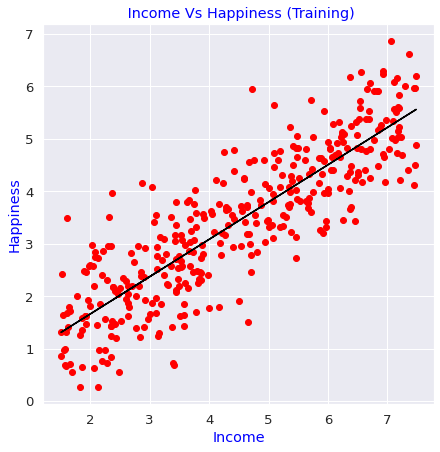

In [ ]:
plt.scatter(inputs_train,outputs_train,color = 'red')
plt.plot(inputs_train,simple_linear_model.predict(inputs_train),color = 'black')
plt.title(' Income Vs Happiness (Training)' , color = 'blue')
plt.xlabel('Income',color = 'blue')
plt.ylabel('Happiness', color = 'blue')
plt.show()

**Testing Visualization**

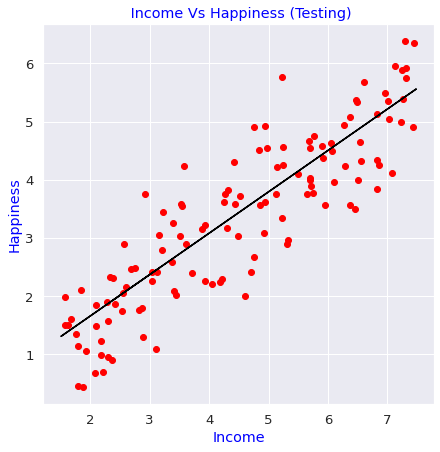

In [ ]:
plt.scatter(inputs_test,outputs_test,color = 'red')
plt.plot(inputs_train,simple_linear_model.predict(inputs_train),color = 'black')
plt.title(' Income Vs Happiness (Testing)' , color = 'blue')
plt.xlabel('Income',color = 'blue')
plt.ylabel('Happiness', color = 'blue')
plt.show()

**Training and Testing Visualization**

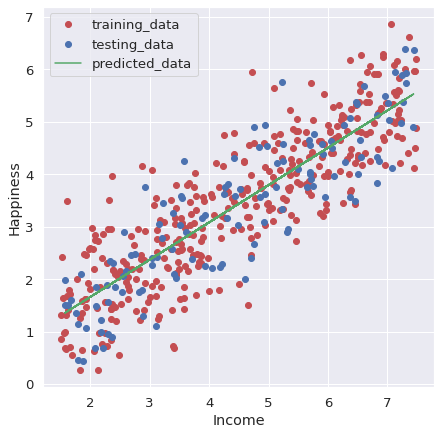

In [ ]:
plt.plot(inputs_train, outputs_train, 'ro', label='training_data')
plt.plot(inputs_test, outputs_test, 'bo', label='testing_data')
plt.plot(inputs_test, outputs_pred, 'g-', label='predicted_data')
plt.xlabel('Income')
plt.ylabel('Happiness')
plt.legend()